In [15]:
# -*- coding: utf-8 -*-
"""
Created on Wed Apr 10 16:17:56 2019
@author: Adham Alkhaja
"""
# -*- coding: utf-8 -*-
"""
Created on Wed Apr 10 14:20:13 2019
@author: Adham Alkhaja
"""
#importing Keras, Library for deep learning 
import keras
#import pydot 

import IPython
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from keras.utils import plot_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import backend as K

from sklearn.preprocessing import StandardScaler
import glob



In [16]:


import os
print(os.listdir("data_hamad/"))


['.DS_Store', 'data_hamad_Scaled.csv', 'Lattice optimisation-Data_training.csv', 'Lattice_optimisation_DLYusra.h5', 'unseendata_hamad_Scaled.csv', 'unseendata_hamad_Scaled_2.csv']


In [17]:
#DEFINING THE FUNCTIONS

#FUNCTION 1:
def prepare_data(n_train):

    import pandas as pd
    import numpy as np

    train=pd.read_csv('data_hamad/data_hamad_Scaled.csv')
    train.head()

    X=train.drop(['Target','Target.1', 'Target.2'] , axis=1)
    Y=train.drop(['Feature','Feature.1', 'Feature.2'] , axis=1)

    X = np.array(X)
    Y = np.array(Y)
   # scaler = MinMaxScaler()

   # scaler.fit(X)
   # scaler.fit(Y)
    
   # X = scaler.transform(X)
   # Y = scaler.transform(Y)

    xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=n_train)

    return xtrain, xtest, ytrain, ytest


In [18]:
def swish(x):
    return (K.sigmoid(x) * x)
    get_custom_objects().update({'swish': Activation(swish)})

In [19]:

#FUNCTION 2:
def get_base_model(trainX, trainy):
    
    #Building the NN structure
    model = Sequential()
    def swish(x):
        return (K.sigmoid(x) * x)
        get_custom_objects().update({'swish': Activation(swish)})
        #get_custom_objects().update({'swish': Activation(swish)})
    model.add(Dense(units = 50, input_dim = 3, init = 'normal', activation=swish))
   # model.add(Dense(units = 10, init = 'uniform',activation='tanh'))
    model.add(Dense(3, activation='sigmoid')) #output layer
    
    # Compile model
    model.compile(optimizer = 'rmsprop', loss = 'mean_squared_error', metrics=['mse','mae'])
    
    # Fit the model
    history =  model.fit(trainX, trainy, batch_size = 1, epochs = 1000,  validation_split= 0, verbose=1)
    return model



In [20]:
#FUNCTION 3:
def evaluate_model(model, trainX, testX, trainy, testy):
    testscore = model.evaluate(testX, testy, batch_size=1)
    trainscore = model.evaluate(trainX, trainy, batch_size=1)
    return testscore, trainscore
	

# add one new layer and re-train only the new layer
def add_layer(model, trainX, trainy):
	# remember the current output layer
	output_layer = model.layers[-1]
	# remove the output layer (model.summary() to check)
	model.pop()
	# mark all remaining layers as non-trainable
    
    
	#for layer in model.layers:
     #   layer.trainable = False 
        
	# add a new hidden layer
	model.add(Dense(50,input_dim = (None,50), activation='relu'))
	# re-add the output layer
	model.add(output_layer)
	# fit model
	model.fit(trainX, trainy, epochs=1500, verbose=1)
    
    


In [21]:

#Calling the functions
trainscores = dict()
testscores = dict()

trainX, testX, trainy, testy = prepare_data(3)
model= get_base_model(trainX, trainy)
evaluate_model(model, trainX, testX, trainy, testy)


    
model.summary()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=50, input_dim=3, activation=<function ..., kernel_initializer="normal")`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/1000
12/12 [==============================] - 0s 17ms/step - loss: 0.1352 - mean_squared_error: 0.1352 - mean_absolute_error: 0.3324
Epoch 2/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.1304 - mean_squared_error: 0.1304 - mean_absolute_error: 0.3257
Epoch 3/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.1270 - mean_squared_error: 0.1270 - mean_absolute_error: 0.3204
Epoch 4/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3148
Epoch 5/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.1212 - mean_squared_error: 0.1212 - mean_absolute_error: 0.3107
Epoch 6/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.1186 - mean_squared_error: 0.1186 - mean_absolute_error: 0.3058
Epoch 7/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.1163 - mean_squared_error: 0.1163 - mean_absolute_error: 0.3023
Epoch 8/1000
12/12 

12/12 [==============================] - 0s 2ms/step - loss: 0.0669 - mean_squared_error: 0.0669 - mean_absolute_error: 0.2136
Epoch 60/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0660 - mean_squared_error: 0.0660 - mean_absolute_error: 0.2137
Epoch 61/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0661 - mean_squared_error: 0.0661 - mean_absolute_error: 0.2077
Epoch 62/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0651 - mean_squared_error: 0.0651 - mean_absolute_error: 0.2098
Epoch 63/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0642 - mean_squared_error: 0.0642 - mean_absolute_error: 0.2094
Epoch 64/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0633 - mean_squared_error: 0.0633 - mean_absolute_error: 0.2113
Epoch 65/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0631 - mean_squared_error: 0.0631 - mean_absolute_error: 0.2080
Epoch 66/1000
12/12 [======

12/12 [==============================] - 0s 2ms/step - loss: 0.0466 - mean_squared_error: 0.0466 - mean_absolute_error: 0.1734
Epoch 118/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0463 - mean_squared_error: 0.0463 - mean_absolute_error: 0.1724
Epoch 119/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0460 - mean_squared_error: 0.0460 - mean_absolute_error: 0.1749
Epoch 120/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0461 - mean_squared_error: 0.0461 - mean_absolute_error: 0.1733
Epoch 121/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0456 - mean_squared_error: 0.0456 - mean_absolute_error: 0.1727
Epoch 122/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0461 - mean_squared_error: 0.0461 - mean_absolute_error: 0.1704
Epoch 123/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0459 - mean_squared_error: 0.0459 - mean_absolute_error: 0.1691
Epoch 124/1000
12/12 

12/12 [==============================] - 0s 2ms/step - loss: 0.0430 - mean_squared_error: 0.0430 - mean_absolute_error: 0.1609
Epoch 175/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0433 - mean_squared_error: 0.0433 - mean_absolute_error: 0.1589
Epoch 176/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0430 - mean_squared_error: 0.0430 - mean_absolute_error: 0.1603
Epoch 177/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0435 - mean_squared_error: 0.0435 - mean_absolute_error: 0.1577
Epoch 178/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0433 - mean_squared_error: 0.0433 - mean_absolute_error: 0.1581
Epoch 179/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0431 - mean_squared_error: 0.0431 - mean_absolute_error: 0.1575
Epoch 180/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0431 - mean_squared_error: 0.0431 - mean_absolute_error: 0.1586
Epoch 181/1000
12/12 

12/12 [==============================] - 0s 1ms/step - loss: 0.0425 - mean_squared_error: 0.0425 - mean_absolute_error: 0.1522
Epoch 232/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0420 - mean_squared_error: 0.0420 - mean_absolute_error: 0.1540
Epoch 233/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0421 - mean_squared_error: 0.0421 - mean_absolute_error: 0.1539
Epoch 234/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0423 - mean_squared_error: 0.0423 - mean_absolute_error: 0.1534
Epoch 235/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0422 - mean_squared_error: 0.0422 - mean_absolute_error: 0.1539
Epoch 236/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0420 - mean_squared_error: 0.0420 - mean_absolute_error: 0.1541
Epoch 237/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0423 - mean_squared_error: 0.0423 - mean_absolute_error: 0.1507
Epoch 238/1000
12/12 

12/12 [==============================] - 0s 1ms/step - loss: 0.0420 - mean_squared_error: 0.0420 - mean_absolute_error: 0.1491
Epoch 289/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0420 - mean_squared_error: 0.0420 - mean_absolute_error: 0.1503
Epoch 290/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0416 - mean_squared_error: 0.0416 - mean_absolute_error: 0.1501
Epoch 291/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0417 - mean_squared_error: 0.0417 - mean_absolute_error: 0.1508
Epoch 292/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0417 - mean_squared_error: 0.0417 - mean_absolute_error: 0.1512
Epoch 293/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0421 - mean_squared_error: 0.0421 - mean_absolute_error: 0.1503
Epoch 294/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0418 - mean_squared_error: 0.0418 - mean_absolute_error: 0.1495
Epoch 295/1000
12/12 

12/12 [==============================] - 0s 2ms/step - loss: 0.0414 - mean_squared_error: 0.0414 - mean_absolute_error: 0.1504
Epoch 346/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0415 - mean_squared_error: 0.0415 - mean_absolute_error: 0.1500
Epoch 347/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0413 - mean_squared_error: 0.0413 - mean_absolute_error: 0.1481
Epoch 348/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0415 - mean_squared_error: 0.0415 - mean_absolute_error: 0.1482
Epoch 349/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0420 - mean_squared_error: 0.0420 - mean_absolute_error: 0.1476
Epoch 350/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0414 - mean_squared_error: 0.0414 - mean_absolute_error: 0.1493
Epoch 351/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0414 - mean_squared_error: 0.0414 - mean_absolute_error: 0.1491
Epoch 352/1000
12/12 

12/12 [==============================] - 0s 1ms/step - loss: 0.0412 - mean_squared_error: 0.0412 - mean_absolute_error: 0.1456
Epoch 403/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0412 - mean_squared_error: 0.0412 - mean_absolute_error: 0.1473
Epoch 404/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0411 - mean_squared_error: 0.0411 - mean_absolute_error: 0.1481
Epoch 405/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0407 - mean_squared_error: 0.0407 - mean_absolute_error: 0.1489
Epoch 406/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0413 - mean_squared_error: 0.0413 - mean_absolute_error: 0.1478
Epoch 407/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0415 - mean_squared_error: 0.0415 - mean_absolute_error: 0.1444
Epoch 408/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0406 - mean_squared_error: 0.0406 - mean_absolute_error: 0.1483
Epoch 409/1000
12/12 

12/12 [==============================] - 0s 1ms/step - loss: 0.0410 - mean_squared_error: 0.0410 - mean_absolute_error: 0.1469
Epoch 460/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0411 - mean_squared_error: 0.0411 - mean_absolute_error: 0.1456
Epoch 461/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0409 - mean_squared_error: 0.0409 - mean_absolute_error: 0.1458
Epoch 462/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0407 - mean_squared_error: 0.0407 - mean_absolute_error: 0.1489
Epoch 463/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0409 - mean_squared_error: 0.0409 - mean_absolute_error: 0.1472
Epoch 464/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0411 - mean_squared_error: 0.0411 - mean_absolute_error: 0.1449
Epoch 465/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0409 - mean_squared_error: 0.0409 - mean_absolute_error: 0.1460
Epoch 466/1000
12/12 

12/12 [==============================] - 0s 1ms/step - loss: 0.0405 - mean_squared_error: 0.0405 - mean_absolute_error: 0.1455
Epoch 517/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0403 - mean_squared_error: 0.0403 - mean_absolute_error: 0.1470
Epoch 518/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0407 - mean_squared_error: 0.0407 - mean_absolute_error: 0.1459
Epoch 519/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0404 - mean_squared_error: 0.0404 - mean_absolute_error: 0.1452
Epoch 520/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0406 - mean_squared_error: 0.0406 - mean_absolute_error: 0.1450
Epoch 521/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0406 - mean_squared_error: 0.0406 - mean_absolute_error: 0.1457
Epoch 522/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0406 - mean_squared_error: 0.0406 - mean_absolute_error: 0.1446
Epoch 523/1000
12/12 

12/12 [==============================] - 0s 1ms/step - loss: 0.0404 - mean_squared_error: 0.0404 - mean_absolute_error: 0.1443
Epoch 574/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0400 - mean_squared_error: 0.0400 - mean_absolute_error: 0.1437
Epoch 575/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0398 - mean_squared_error: 0.0398 - mean_absolute_error: 0.1460
Epoch 576/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0398 - mean_squared_error: 0.0398 - mean_absolute_error: 0.1471
Epoch 577/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0405 - mean_squared_error: 0.0405 - mean_absolute_error: 0.1431
Epoch 578/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0403 - mean_squared_error: 0.0403 - mean_absolute_error: 0.1427
Epoch 579/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0397 - mean_squared_error: 0.0397 - mean_absolute_error: 0.1456
Epoch 580/1000
12/12 

12/12 [==============================] - 0s 2ms/step - loss: 0.0400 - mean_squared_error: 0.0400 - mean_absolute_error: 0.1427
Epoch 631/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0398 - mean_squared_error: 0.0398 - mean_absolute_error: 0.1424
Epoch 632/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0396 - mean_squared_error: 0.0396 - mean_absolute_error: 0.1441
Epoch 633/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0397 - mean_squared_error: 0.0397 - mean_absolute_error: 0.1416
Epoch 634/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0398 - mean_squared_error: 0.0398 - mean_absolute_error: 0.1432
Epoch 635/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0397 - mean_squared_error: 0.0397 - mean_absolute_error: 0.1427
Epoch 636/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0395 - mean_squared_error: 0.0395 - mean_absolute_error: 0.1446
Epoch 637/1000
12/12 

12/12 [==============================] - 0s 1ms/step - loss: 0.0392 - mean_squared_error: 0.0392 - mean_absolute_error: 0.1406
Epoch 688/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0392 - mean_squared_error: 0.0392 - mean_absolute_error: 0.1431
Epoch 689/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0388 - mean_squared_error: 0.0388 - mean_absolute_error: 0.1454
Epoch 690/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0392 - mean_squared_error: 0.0392 - mean_absolute_error: 0.1419
Epoch 691/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0391 - mean_squared_error: 0.0391 - mean_absolute_error: 0.1429
Epoch 692/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0387 - mean_squared_error: 0.0387 - mean_absolute_error: 0.1438
Epoch 693/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0394 - mean_squared_error: 0.0394 - mean_absolute_error: 0.1412
Epoch 694/1000
12/12 

12/12 [==============================] - 0s 1ms/step - loss: 0.0382 - mean_squared_error: 0.0382 - mean_absolute_error: 0.1433
Epoch 745/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0384 - mean_squared_error: 0.0384 - mean_absolute_error: 0.1426
Epoch 746/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0386 - mean_squared_error: 0.0386 - mean_absolute_error: 0.1418
Epoch 747/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0384 - mean_squared_error: 0.0384 - mean_absolute_error: 0.1418
Epoch 748/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0387 - mean_squared_error: 0.0387 - mean_absolute_error: 0.1393
Epoch 749/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0386 - mean_squared_error: 0.0386 - mean_absolute_error: 0.1399
Epoch 750/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0381 - mean_squared_error: 0.0381 - mean_absolute_error: 0.1427
Epoch 751/1000
12/12 

12/12 [==============================] - 0s 1ms/step - loss: 0.0379 - mean_squared_error: 0.0379 - mean_absolute_error: 0.1375
Epoch 802/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0377 - mean_squared_error: 0.0377 - mean_absolute_error: 0.1397
Epoch 803/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0377 - mean_squared_error: 0.0377 - mean_absolute_error: 0.1398
Epoch 804/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0372 - mean_squared_error: 0.0372 - mean_absolute_error: 0.1433
Epoch 805/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0373 - mean_squared_error: 0.0373 - mean_absolute_error: 0.1401
Epoch 806/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0376 - mean_squared_error: 0.0376 - mean_absolute_error: 0.1413
Epoch 807/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0376 - mean_squared_error: 0.0376 - mean_absolute_error: 0.1398    
Epoch 808/1000
12

12/12 [==============================] - 0s 1ms/step - loss: 0.0368 - mean_squared_error: 0.0368 - mean_absolute_error: 0.1378
Epoch 859/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0368 - mean_squared_error: 0.0368 - mean_absolute_error: 0.1396
Epoch 860/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0367 - mean_squared_error: 0.0367 - mean_absolute_error: 0.1381
Epoch 861/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0368 - mean_squared_error: 0.0368 - mean_absolute_error: 0.1393
Epoch 862/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0367 - mean_squared_error: 0.0367 - mean_absolute_error: 0.1379
Epoch 863/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0366 - mean_squared_error: 0.0366 - mean_absolute_error: 0.1382
Epoch 864/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0367 - mean_squared_error: 0.0367 - mean_absolute_error: 0.1378
Epoch 865/1000
12/12 

12/12 [==============================] - 0s 1ms/step - loss: 0.0357 - mean_squared_error: 0.0357 - mean_absolute_error: 0.1347
Epoch 916/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0354 - mean_squared_error: 0.0354 - mean_absolute_error: 0.1378
Epoch 917/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - mean_absolute_error: 0.1377
Epoch 918/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0360 - mean_squared_error: 0.0360 - mean_absolute_error: 0.1361
Epoch 919/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0350 - mean_squared_error: 0.0350 - mean_absolute_error: 0.1387
Epoch 920/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0360 - mean_squared_error: 0.0360 - mean_absolute_error: 0.1336
Epoch 921/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0352 - mean_squared_error: 0.0352 - mean_absolute_error: 0.1386    
Epoch 922/1000
12

12/12 [==============================] - 0s 1ms/step - loss: 0.0344 - mean_squared_error: 0.0344 - mean_absolute_error: 0.1359
Epoch 973/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0347 - mean_squared_error: 0.0347 - mean_absolute_error: 0.1326
Epoch 974/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0341 - mean_squared_error: 0.0341 - mean_absolute_error: 0.1363
Epoch 975/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0342 - mean_squared_error: 0.0342 - mean_absolute_error: 0.1345
Epoch 976/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0343 - mean_squared_error: 0.0343 - mean_absolute_error: 0.1350
Epoch 977/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0344 - mean_squared_error: 0.0344 - mean_absolute_error: 0.1342
Epoch 978/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0342 - mean_squared_error: 0.0342 - mean_absolute_error: 0.1344
Epoch 979/1000
12/12 

In [9]:
print(trainy)

[[0.088482 0.018998 0.029298]
 [0.11582  0.032275 0.069616]
 [0.29402  0.12111  0.2033  ]
 [0.29746  0.1331   0.19427 ]
 [0.29554  1.       0.40881 ]
 [0.32203  0.14713  0.21614 ]
 [1.       0.82966  0.80492 ]
 [0.28923  0.44765  0.28959 ]
 [0.       0.       0.      ]
 [0.52481  0.16267  0.35035 ]
 [0.13516  0.042206 0.099699]
 [0.95274  0.89529  1.      ]]


In [22]:

# add layer
n_layers = 2
for i in range(n_layers):
    add_layer(model, trainX, trainy)
    
# evaluate model
    testscorex, trainscorex = evaluate_model(model, trainX, testX, trainy, testy)
#    print('> layers=%d, train=%.3f, test=%.3f' % (len(model.layers), testscore, trainscore))
    trainscores[len(model.layers)] = (trainscorex[0], trainscorex[2])
    testscores[len(model.layers)] = (testscorex[0], testscorex[2])

Epoch 1/1500
12/12 [==============================] - 0s 18ms/step - loss: 0.1239 - mean_squared_error: 0.1239 - mean_absolute_error: 0.3189
Epoch 2/1500
12/12 [==============================] - 0s 176us/step - loss: 0.0897 - mean_squared_error: 0.0897 - mean_absolute_error: 0.2620
Epoch 3/1500
12/12 [==============================] - 0s 275us/step - loss: 0.0781 - mean_squared_error: 0.0781 - mean_absolute_error: 0.2402
Epoch 4/1500
12/12 [==============================] - 0s 151us/step - loss: 0.0718 - mean_squared_error: 0.0718 - mean_absolute_error: 0.2284
Epoch 5/1500
12/12 [==============================] - 0s 329us/step - loss: 0.0673 - mean_squared_error: 0.0673 - mean_absolute_error: 0.2189
Epoch 6/1500
12/12 [==============================] - 0s 251us/step - loss: 0.0639 - mean_squared_error: 0.0639 - mean_absolute_error: 0.2125
Epoch 7/1500
12/12 [==============================] - 0s 206us/step - loss: 0.0612 - mean_squared_error: 0.0612 - mean_absolute_error: 0.2070
Epoch 8

Epoch 59/1500
12/12 [==============================] - 0s 126us/step - loss: 0.0226 - mean_squared_error: 0.0226 - mean_absolute_error: 0.1141
Epoch 60/1500
12/12 [==============================] - 0s 166us/step - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.1108
Epoch 61/1500
12/12 [==============================] - 0s 319us/step - loss: 0.0219 - mean_squared_error: 0.0219 - mean_absolute_error: 0.1122
Epoch 62/1500
12/12 [==============================] - 0s 299us/step - loss: 0.0216 - mean_squared_error: 0.0216 - mean_absolute_error: 0.1093
Epoch 63/1500
12/12 [==============================] - 0s 142us/step - loss: 0.0213 - mean_squared_error: 0.0213 - mean_absolute_error: 0.1106
Epoch 64/1500
12/12 [==============================] - 0s 147us/step - loss: 0.0211 - mean_squared_error: 0.0211 - mean_absolute_error: 0.1077
Epoch 65/1500
12/12 [==============================] - 0s 354us/step - loss: 0.0208 - mean_squared_error: 0.0208 - mean_absolute_error: 0.1093

Epoch 117/1500
12/12 [==============================] - 0s 333us/step - loss: 0.0087 - mean_squared_error: 0.0087 - mean_absolute_error: 0.0665
Epoch 118/1500
12/12 [==============================] - 0s 286us/step - loss: 0.0087 - mean_squared_error: 0.0087 - mean_absolute_error: 0.0669
Epoch 119/1500
12/12 [==============================] - 0s 132us/step - loss: 0.0086 - mean_squared_error: 0.0086 - mean_absolute_error: 0.0642
Epoch 120/1500
12/12 [==============================] - 0s 394us/step - loss: 0.0084 - mean_squared_error: 0.0084 - mean_absolute_error: 0.0658
Epoch 121/1500
12/12 [==============================] - 0s 486us/step - loss: 0.0084 - mean_squared_error: 0.0084 - mean_absolute_error: 0.0628
Epoch 122/1500
12/12 [==============================] - 0s 175us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0649
Epoch 123/1500
12/12 [==============================] - 0s 319us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error:

Epoch 174/1500
12/12 [==============================] - 0s 205us/step - loss: 0.0034 - mean_squared_error: 0.0034 - mean_absolute_error: 0.0416
Epoch 175/1500
12/12 [==============================] - 0s 157us/step - loss: 0.0034 - mean_squared_error: 0.0034 - mean_absolute_error: 0.0404
Epoch 176/1500
12/12 [==============================] - 0s 178us/step - loss: 0.0033 - mean_squared_error: 0.0033 - mean_absolute_error: 0.0411
Epoch 177/1500
12/12 [==============================] - 0s 147us/step - loss: 0.0033 - mean_squared_error: 0.0033 - mean_absolute_error: 0.0402
Epoch 178/1500
12/12 [==============================] - 0s 395us/step - loss: 0.0032 - mean_squared_error: 0.0032 - mean_absolute_error: 0.0410
Epoch 179/1500
12/12 [==============================] - 0s 154us/step - loss: 0.0032 - mean_squared_error: 0.0032 - mean_absolute_error: 0.0403
Epoch 180/1500
12/12 [==============================] - 0s 184us/step - loss: 0.0032 - mean_squared_error: 0.0032 - mean_absolute_error:

Epoch 231/1500
12/12 [==============================] - 0s 166us/step - loss: 0.0020 - mean_squared_error: 0.0020 - mean_absolute_error: 0.0331
Epoch 232/1500
12/12 [==============================] - 0s 143us/step - loss: 0.0020 - mean_squared_error: 0.0020 - mean_absolute_error: 0.0333
Epoch 233/1500
12/12 [==============================] - 0s 191us/step - loss: 0.0020 - mean_squared_error: 0.0020 - mean_absolute_error: 0.0328
Epoch 234/1500
12/12 [==============================] - 0s 256us/step - loss: 0.0019 - mean_squared_error: 0.0019 - mean_absolute_error: 0.0334
Epoch 235/1500
12/12 [==============================] - 0s 174us/step - loss: 0.0020 - mean_squared_error: 0.0020 - mean_absolute_error: 0.0329
Epoch 236/1500
12/12 [==============================] - 0s 182us/step - loss: 0.0019 - mean_squared_error: 0.0019 - mean_absolute_error: 0.0336
Epoch 237/1500
12/12 [==============================] - 0s 172us/step - loss: 0.0020 - mean_squared_error: 0.0020 - mean_absolute_error:

Epoch 288/1500
12/12 [==============================] - 0s 242us/step - loss: 0.0015 - mean_squared_error: 0.0015 - mean_absolute_error: 0.0296
Epoch 289/1500
12/12 [==============================] - 0s 245us/step - loss: 0.0015 - mean_squared_error: 0.0015 - mean_absolute_error: 0.0281
Epoch 290/1500
12/12 [==============================] - 0s 164us/step - loss: 0.0014 - mean_squared_error: 0.0014 - mean_absolute_error: 0.0289
Epoch 291/1500
12/12 [==============================] - 0s 147us/step - loss: 0.0014 - mean_squared_error: 0.0014 - mean_absolute_error: 0.0276
Epoch 292/1500
12/12 [==============================] - 0s 217us/step - loss: 0.0014 - mean_squared_error: 0.0014 - mean_absolute_error: 0.0284
Epoch 293/1500
12/12 [==============================] - 0s 248us/step - loss: 0.0014 - mean_squared_error: 0.0014 - mean_absolute_error: 0.0275
Epoch 294/1500
12/12 [==============================] - 0s 122us/step - loss: 0.0014 - mean_squared_error: 0.0014 - mean_absolute_error:

Epoch 345/1500
12/12 [==============================] - 0s 140us/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0231
Epoch 346/1500
12/12 [==============================] - 0s 178us/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0249
Epoch 347/1500
12/12 [==============================] - 0s 212us/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0233
Epoch 348/1500
12/12 [==============================] - 0s 171us/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0250
Epoch 349/1500
12/12 [==============================] - 0s 312us/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0232
Epoch 350/1500
12/12 [==============================] - 0s 127us/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0249
Epoch 351/1500
12/12 [==============================] - 0s 149us/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error:

Epoch 401/1500
12/12 [==============================] - 0s 157us/step - loss: 9.5496e-04 - mean_squared_error: 9.5496e-04 - mean_absolute_error: 0.0211
Epoch 402/1500
12/12 [==============================] - 0s 168us/step - loss: 8.9483e-04 - mean_squared_error: 8.9483e-04 - mean_absolute_error: 0.0216
Epoch 403/1500
12/12 [==============================] - 0s 201us/step - loss: 8.9337e-04 - mean_squared_error: 8.9337e-04 - mean_absolute_error: 0.0200
Epoch 404/1500
12/12 [==============================] - 0s 227us/step - loss: 8.6637e-04 - mean_squared_error: 8.6637e-04 - mean_absolute_error: 0.0207
Epoch 405/1500
12/12 [==============================] - 0s 227us/step - loss: 8.6236e-04 - mean_squared_error: 8.6236e-04 - mean_absolute_error: 0.0194
Epoch 406/1500
12/12 [==============================] - 0s 171us/step - loss: 8.3531e-04 - mean_squared_error: 8.3531e-04 - mean_absolute_error: 0.0204
Epoch 407/1500
12/12 [==============================] - 0s 136us/step - loss: 8.4835e-04

Epoch 455/1500
12/12 [==============================] - 0s 281us/step - loss: 7.5466e-04 - mean_squared_error: 7.5466e-04 - mean_absolute_error: 0.0181
Epoch 456/1500
12/12 [==============================] - 0s 122us/step - loss: 7.3704e-04 - mean_squared_error: 7.3704e-04 - mean_absolute_error: 0.0189
Epoch 457/1500
12/12 [==============================] - 0s 260us/step - loss: 7.3761e-04 - mean_squared_error: 7.3761e-04 - mean_absolute_error: 0.0180
Epoch 458/1500
12/12 [==============================] - 0s 272us/step - loss: 7.2083e-04 - mean_squared_error: 7.2083e-04 - mean_absolute_error: 0.0186
Epoch 459/1500
12/12 [==============================] - 0s 183us/step - loss: 7.3468e-04 - mean_squared_error: 7.3468e-04 - mean_absolute_error: 0.0177
Epoch 460/1500
12/12 [==============================] - 0s 174us/step - loss: 7.2940e-04 - mean_squared_error: 7.2940e-04 - mean_absolute_error: 0.0188
Epoch 461/1500
12/12 [==============================] - 0s 213us/step - loss: 7.4323e-04

Epoch 509/1500
12/12 [==============================] - 0s 144us/step - loss: 6.3082e-04 - mean_squared_error: 6.3082e-04 - mean_absolute_error: 0.0162
Epoch 510/1500
12/12 [==============================] - 0s 182us/step - loss: 6.3496e-04 - mean_squared_error: 6.3496e-04 - mean_absolute_error: 0.0171
Epoch 511/1500
12/12 [==============================] - 0s 170us/step - loss: 6.5115e-04 - mean_squared_error: 6.5115e-04 - mean_absolute_error: 0.0170
Epoch 512/1500
12/12 [==============================] - 0s 241us/step - loss: 6.5930e-04 - mean_squared_error: 6.5930e-04 - mean_absolute_error: 0.0179
Epoch 513/1500
12/12 [==============================] - 0s 231us/step - loss: 6.9669e-04 - mean_squared_error: 6.9669e-04 - mean_absolute_error: 0.0180
Epoch 514/1500
12/12 [==============================] - 0s 250us/step - loss: 7.0631e-04 - mean_squared_error: 7.0631e-04 - mean_absolute_error: 0.0191
Epoch 515/1500
12/12 [==============================] - 0s 324us/step - loss: 7.3714e-04

Epoch 563/1500
12/12 [==============================] - 0s 413us/step - loss: 5.9117e-04 - mean_squared_error: 5.9117e-04 - mean_absolute_error: 0.0163
Epoch 564/1500
12/12 [==============================] - 0s 125us/step - loss: 5.8155e-04 - mean_squared_error: 5.8155e-04 - mean_absolute_error: 0.0165
Epoch 565/1500
12/12 [==============================] - 0s 156us/step - loss: 5.9147e-04 - mean_squared_error: 5.9147e-04 - mean_absolute_error: 0.0161
Epoch 566/1500
12/12 [==============================] - 0s 143us/step - loss: 5.9355e-04 - mean_squared_error: 5.9355e-04 - mean_absolute_error: 0.0169
Epoch 567/1500
12/12 [==============================] - 0s 228us/step - loss: 6.1508e-04 - mean_squared_error: 6.1508e-04 - mean_absolute_error: 0.0169
Epoch 568/1500
12/12 [==============================] - 0s 230us/step - loss: 6.2947e-04 - mean_squared_error: 6.2947e-04 - mean_absolute_error: 0.0179
Epoch 569/1500
12/12 [==============================] - 0s 335us/step - loss: 6.7887e-04

Epoch 617/1500
12/12 [==============================] - 0s 221us/step - loss: 5.5858e-04 - mean_squared_error: 5.5858e-04 - mean_absolute_error: 0.0161
Epoch 618/1500
12/12 [==============================] - 0s 405us/step - loss: 5.7492e-04 - mean_squared_error: 5.7492e-04 - mean_absolute_error: 0.0171
Epoch 619/1500
12/12 [==============================] - 0s 110us/step - loss: 6.0539e-04 - mean_squared_error: 6.0539e-04 - mean_absolute_error: 0.0176
Epoch 620/1500
12/12 [==============================] - 0s 454us/step - loss: 6.0883e-04 - mean_squared_error: 6.0883e-04 - mean_absolute_error: 0.0178
Epoch 621/1500
12/12 [==============================] - 0s 186us/step - loss: 6.4269e-04 - mean_squared_error: 6.4269e-04 - mean_absolute_error: 0.0178
Epoch 622/1500
12/12 [==============================] - 0s 112us/step - loss: 6.0891e-04 - mean_squared_error: 6.0891e-04 - mean_absolute_error: 0.0178
Epoch 623/1500
12/12 [==============================] - 0s 301us/step - loss: 6.1203e-04

Epoch 671/1500
12/12 [==============================] - 0s 444us/step - loss: 5.6834e-04 - mean_squared_error: 5.6834e-04 - mean_absolute_error: 0.0169
Epoch 672/1500
12/12 [==============================] - 0s 215us/step - loss: 5.5839e-04 - mean_squared_error: 5.5839e-04 - mean_absolute_error: 0.0170
Epoch 673/1500
12/12 [==============================] - 0s 138us/step - loss: 5.6943e-04 - mean_squared_error: 5.6943e-04 - mean_absolute_error: 0.0172
Epoch 674/1500
12/12 [==============================] - 0s 427us/step - loss: 5.4478e-04 - mean_squared_error: 5.4478e-04 - mean_absolute_error: 0.0168
Epoch 675/1500
12/12 [==============================] - 0s 239us/step - loss: 5.5002e-04 - mean_squared_error: 5.5002e-04 - mean_absolute_error: 0.0165
Epoch 676/1500
12/12 [==============================] - 0s 201us/step - loss: 5.3475e-04 - mean_squared_error: 5.3475e-04 - mean_absolute_error: 0.0164
Epoch 677/1500
12/12 [==============================] - 0s 148us/step - loss: 5.4086e-04

Epoch 725/1500
12/12 [==============================] - 0s 225us/step - loss: 5.3249e-04 - mean_squared_error: 5.3249e-04 - mean_absolute_error: 0.0167
Epoch 726/1500
12/12 [==============================] - 0s 217us/step - loss: 5.2217e-04 - mean_squared_error: 5.2217e-04 - mean_absolute_error: 0.0164
Epoch 727/1500
12/12 [==============================] - 0s 127us/step - loss: 5.4142e-04 - mean_squared_error: 5.4142e-04 - mean_absolute_error: 0.0167
Epoch 728/1500
12/12 [==============================] - 0s 386us/step - loss: 5.2396e-04 - mean_squared_error: 5.2396e-04 - mean_absolute_error: 0.0164
Epoch 729/1500
12/12 [==============================] - 0s 149us/step - loss: 5.3741e-04 - mean_squared_error: 5.3741e-04 - mean_absolute_error: 0.0165
Epoch 730/1500
12/12 [==============================] - 0s 147us/step - loss: 5.1544e-04 - mean_squared_error: 5.1544e-04 - mean_absolute_error: 0.0162
Epoch 731/1500
12/12 [==============================] - 0s 220us/step - loss: 5.2061e-04

Epoch 779/1500
12/12 [==============================] - 0s 250us/step - loss: 4.8892e-04 - mean_squared_error: 4.8892e-04 - mean_absolute_error: 0.0160
Epoch 780/1500
12/12 [==============================] - 0s 236us/step - loss: 4.9392e-04 - mean_squared_error: 4.9392e-04 - mean_absolute_error: 0.0159
Epoch 781/1500
12/12 [==============================] - 0s 229us/step - loss: 5.3183e-04 - mean_squared_error: 5.3183e-04 - mean_absolute_error: 0.0166
Epoch 782/1500
12/12 [==============================] - 0s 190us/step - loss: 5.1419e-04 - mean_squared_error: 5.1419e-04 - mean_absolute_error: 0.0163
Epoch 783/1500
12/12 [==============================] - 0s 298us/step - loss: 5.2180e-04 - mean_squared_error: 5.2180e-04 - mean_absolute_error: 0.0167
Epoch 784/1500
12/12 [==============================] - 0s 116us/step - loss: 4.9454e-04 - mean_squared_error: 4.9454e-04 - mean_absolute_error: 0.0160
Epoch 785/1500
12/12 [==============================] - 0s 182us/step - loss: 4.9566e-04

Epoch 833/1500
12/12 [==============================] - 0s 259us/step - loss: 5.1896e-04 - mean_squared_error: 5.1896e-04 - mean_absolute_error: 0.0162
Epoch 834/1500
12/12 [==============================] - 0s 299us/step - loss: 4.9264e-04 - mean_squared_error: 4.9264e-04 - mean_absolute_error: 0.0158
Epoch 835/1500
12/12 [==============================] - 0s 181us/step - loss: 4.9475e-04 - mean_squared_error: 4.9475e-04 - mean_absolute_error: 0.0162
Epoch 836/1500
12/12 [==============================] - 0s 252us/step - loss: 4.6437e-04 - mean_squared_error: 4.6437e-04 - mean_absolute_error: 0.0154
Epoch 837/1500
12/12 [==============================] - 0s 151us/step - loss: 4.6105e-04 - mean_squared_error: 4.6105e-04 - mean_absolute_error: 0.0155
Epoch 838/1500
12/12 [==============================] - 0s 392us/step - loss: 4.4139e-04 - mean_squared_error: 4.4139e-04 - mean_absolute_error: 0.0149
Epoch 839/1500
12/12 [==============================] - 0s 144us/step - loss: 4.4245e-04

Epoch 887/1500
12/12 [==============================] - 0s 146us/step - loss: 4.6363e-04 - mean_squared_error: 4.6363e-04 - mean_absolute_error: 0.0157
Epoch 888/1500
12/12 [==============================] - 0s 309us/step - loss: 4.4547e-04 - mean_squared_error: 4.4547e-04 - mean_absolute_error: 0.0150
Epoch 889/1500
12/12 [==============================] - 0s 161us/step - loss: 4.5709e-04 - mean_squared_error: 4.5709e-04 - mean_absolute_error: 0.0155
Epoch 890/1500
12/12 [==============================] - 0s 214us/step - loss: 4.4226e-04 - mean_squared_error: 4.4226e-04 - mean_absolute_error: 0.0148
Epoch 891/1500
12/12 [==============================] - 0s 324us/step - loss: 4.4999e-04 - mean_squared_error: 4.4999e-04 - mean_absolute_error: 0.0150
Epoch 892/1500
12/12 [==============================] - 0s 246us/step - loss: 4.2771e-04 - mean_squared_error: 4.2771e-04 - mean_absolute_error: 0.0144
Epoch 893/1500
12/12 [==============================] - 0s 289us/step - loss: 4.3075e-04

Epoch 941/1500
12/12 [==============================] - 0s 506us/step - loss: 4.6304e-04 - mean_squared_error: 4.6304e-04 - mean_absolute_error: 0.0158
Epoch 942/1500
12/12 [==============================] - 0s 439us/step - loss: 4.3293e-04 - mean_squared_error: 4.3293e-04 - mean_absolute_error: 0.0148
Epoch 943/1500
12/12 [==============================] - 0s 346us/step - loss: 4.3167e-04 - mean_squared_error: 4.3167e-04 - mean_absolute_error: 0.0151
Epoch 944/1500
12/12 [==============================] - 0s 305us/step - loss: 4.1964e-04 - mean_squared_error: 4.1964e-04 - mean_absolute_error: 0.0144
Epoch 945/1500
12/12 [==============================] - 0s 360us/step - loss: 4.4819e-04 - mean_squared_error: 4.4819e-04 - mean_absolute_error: 0.0149
Epoch 946/1500
12/12 [==============================] - 0s 316us/step - loss: 4.1052e-04 - mean_squared_error: 4.1052e-04 - mean_absolute_error: 0.0142
Epoch 947/1500
12/12 [==============================] - 0s 143us/step - loss: 4.0641e-04

Epoch 995/1500
12/12 [==============================] - 0s 193us/step - loss: 4.4089e-04 - mean_squared_error: 4.4089e-04 - mean_absolute_error: 0.0156
Epoch 996/1500
12/12 [==============================] - 0s 136us/step - loss: 4.1784e-04 - mean_squared_error: 4.1784e-04 - mean_absolute_error: 0.0146
Epoch 997/1500
12/12 [==============================] - 0s 270us/step - loss: 4.4460e-04 - mean_squared_error: 4.4460e-04 - mean_absolute_error: 0.0151
Epoch 998/1500
12/12 [==============================] - 0s 216us/step - loss: 4.0993e-04 - mean_squared_error: 4.0993e-04 - mean_absolute_error: 0.0146
Epoch 999/1500
12/12 [==============================] - 0s 145us/step - loss: 4.0654e-04 - mean_squared_error: 4.0654e-04 - mean_absolute_error: 0.0149
Epoch 1000/1500
12/12 [==============================] - 0s 241us/step - loss: 3.7936e-04 - mean_squared_error: 3.7936e-04 - mean_absolute_error: 0.0138
Epoch 1001/1500
12/12 [==============================] - 0s 284us/step - loss: 3.7517e-

Epoch 1049/1500
12/12 [==============================] - 0s 174us/step - loss: 4.0640e-04 - mean_squared_error: 4.0640e-04 - mean_absolute_error: 0.0146
Epoch 1050/1500
12/12 [==============================] - 0s 265us/step - loss: 3.7897e-04 - mean_squared_error: 3.7897e-04 - mean_absolute_error: 0.0138
Epoch 1051/1500
12/12 [==============================] - 0s 250us/step - loss: 3.7793e-04 - mean_squared_error: 3.7793e-04 - mean_absolute_error: 0.0141
Epoch 1052/1500
12/12 [==============================] - 0s 156us/step - loss: 3.6010e-04 - mean_squared_error: 3.6010e-04 - mean_absolute_error: 0.0135
Epoch 1053/1500
12/12 [==============================] - 0s 252us/step - loss: 3.6468e-04 - mean_squared_error: 3.6468e-04 - mean_absolute_error: 0.0139
Epoch 1054/1500
12/12 [==============================] - 0s 294us/step - loss: 3.5808e-04 - mean_squared_error: 3.5808e-04 - mean_absolute_error: 0.0135
Epoch 1055/1500
12/12 [==============================] - 0s 209us/step - loss: 3.7

Epoch 1103/1500
12/12 [==============================] - 0s 157us/step - loss: 3.5011e-04 - mean_squared_error: 3.5011e-04 - mean_absolute_error: 0.0137
Epoch 1104/1500
12/12 [==============================] - 0s 132us/step - loss: 3.4737e-04 - mean_squared_error: 3.4737e-04 - mean_absolute_error: 0.0135
Epoch 1105/1500
12/12 [==============================] - 0s 317us/step - loss: 3.6851e-04 - mean_squared_error: 3.6851e-04 - mean_absolute_error: 0.0141
Epoch 1106/1500
12/12 [==============================] - 0s 238us/step - loss: 3.6517e-04 - mean_squared_error: 3.6517e-04 - mean_absolute_error: 0.0138
Epoch 1107/1500
12/12 [==============================] - 0s 104us/step - loss: 3.8605e-04 - mean_squared_error: 3.8605e-04 - mean_absolute_error: 0.0143
Epoch 1108/1500
12/12 [==============================] - 0s 183us/step - loss: 3.7734e-04 - mean_squared_error: 3.7734e-04 - mean_absolute_error: 0.0140
Epoch 1109/1500
12/12 [==============================] - 0s 151us/step - loss: 3.9

Epoch 1157/1500
12/12 [==============================] - 0s 263us/step - loss: 4.0445e-04 - mean_squared_error: 4.0445e-04 - mean_absolute_error: 0.0148
Epoch 1158/1500
12/12 [==============================] - 0s 142us/step - loss: 3.7860e-04 - mean_squared_error: 3.7860e-04 - mean_absolute_error: 0.0142
Epoch 1159/1500
12/12 [==============================] - 0s 152us/step - loss: 3.7649e-04 - mean_squared_error: 3.7649e-04 - mean_absolute_error: 0.0142
Epoch 1160/1500
12/12 [==============================] - 0s 257us/step - loss: 3.4092e-04 - mean_squared_error: 3.4092e-04 - mean_absolute_error: 0.0131
Epoch 1161/1500
12/12 [==============================] - 0s 179us/step - loss: 3.3875e-04 - mean_squared_error: 3.3875e-04 - mean_absolute_error: 0.0132
Epoch 1162/1500
12/12 [==============================] - 0s 147us/step - loss: 3.1802e-04 - mean_squared_error: 3.1802e-04 - mean_absolute_error: 0.0125
Epoch 1163/1500
12/12 [==============================] - 0s 171us/step - loss: 3.1

Epoch 1211/1500
12/12 [==============================] - 0s 244us/step - loss: 3.1185e-04 - mean_squared_error: 3.1185e-04 - mean_absolute_error: 0.0128
Epoch 1212/1500
12/12 [==============================] - 0s 218us/step - loss: 2.9424e-04 - mean_squared_error: 2.9424e-04 - mean_absolute_error: 0.0122
Epoch 1213/1500
12/12 [==============================] - 0s 150us/step - loss: 2.9613e-04 - mean_squared_error: 2.9613e-04 - mean_absolute_error: 0.0124
Epoch 1214/1500
12/12 [==============================] - 0s 125us/step - loss: 2.9251e-04 - mean_squared_error: 2.9251e-04 - mean_absolute_error: 0.0122
Epoch 1215/1500
12/12 [==============================] - 0s 279us/step - loss: 3.0559e-04 - mean_squared_error: 3.0559e-04 - mean_absolute_error: 0.0127
Epoch 1216/1500
12/12 [==============================] - 0s 274us/step - loss: 3.1510e-04 - mean_squared_error: 3.1510e-04 - mean_absolute_error: 0.0129
Epoch 1217/1500
12/12 [==============================] - 0s 118us/step - loss: 3.5

Epoch 1265/1500
12/12 [==============================] - 0s 486us/step - loss: 2.9349e-04 - mean_squared_error: 2.9349e-04 - mean_absolute_error: 0.0126
Epoch 1266/1500
12/12 [==============================] - 0s 481us/step - loss: 3.0049e-04 - mean_squared_error: 3.0049e-04 - mean_absolute_error: 0.0127
Epoch 1267/1500
12/12 [==============================] - 0s 467us/step - loss: 3.2268e-04 - mean_squared_error: 3.2268e-04 - mean_absolute_error: 0.0134
Epoch 1268/1500
12/12 [==============================] - 0s 212us/step - loss: 3.3241e-04 - mean_squared_error: 3.3241e-04 - mean_absolute_error: 0.0136
Epoch 1269/1500
12/12 [==============================] - 0s 394us/step - loss: 3.7411e-04 - mean_squared_error: 3.7411e-04 - mean_absolute_error: 0.0142
Epoch 1270/1500
12/12 [==============================] - 0s 187us/step - loss: 3.6270e-04 - mean_squared_error: 3.6270e-04 - mean_absolute_error: 0.0141
Epoch 1271/1500
12/12 [==============================] - 0s 350us/step - loss: 3.7

Epoch 1319/1500
12/12 [==============================] - 0s 172us/step - loss: 3.5499e-04 - mean_squared_error: 3.5499e-04 - mean_absolute_error: 0.0139
Epoch 1320/1500
12/12 [==============================] - 0s 182us/step - loss: 3.2593e-04 - mean_squared_error: 3.2593e-04 - mean_absolute_error: 0.0132
Epoch 1321/1500
12/12 [==============================] - 0s 162us/step - loss: 3.1576e-04 - mean_squared_error: 3.1576e-04 - mean_absolute_error: 0.0129
Epoch 1322/1500
12/12 [==============================] - 0s 325us/step - loss: 2.8416e-04 - mean_squared_error: 2.8416e-04 - mean_absolute_error: 0.0121
Epoch 1323/1500
12/12 [==============================] - 0s 150us/step - loss: 2.8055e-04 - mean_squared_error: 2.8055e-04 - mean_absolute_error: 0.0121
Epoch 1324/1500
12/12 [==============================] - 0s 196us/step - loss: 2.6914e-04 - mean_squared_error: 2.6914e-04 - mean_absolute_error: 0.0118
Epoch 1325/1500
12/12 [==============================] - 0s 173us/step - loss: 2.8

Epoch 1373/1500
12/12 [==============================] - 0s 143us/step - loss: 2.7659e-04 - mean_squared_error: 2.7659e-04 - mean_absolute_error: 0.0122
Epoch 1374/1500
12/12 [==============================] - 0s 256us/step - loss: 2.5446e-04 - mean_squared_error: 2.5446e-04 - mean_absolute_error: 0.0116
Epoch 1375/1500
12/12 [==============================] - 0s 193us/step - loss: 2.5287e-04 - mean_squared_error: 2.5287e-04 - mean_absolute_error: 0.0114
Epoch 1376/1500
12/12 [==============================] - 0s 251us/step - loss: 2.4818e-04 - mean_squared_error: 2.4818e-04 - mean_absolute_error: 0.0114
Epoch 1377/1500
12/12 [==============================] - 0s 211us/step - loss: 2.5851e-04 - mean_squared_error: 2.5851e-04 - mean_absolute_error: 0.0117
Epoch 1378/1500
12/12 [==============================] - 0s 141us/step - loss: 2.6308e-04 - mean_squared_error: 2.6308e-04 - mean_absolute_error: 0.0119
Epoch 1379/1500
12/12 [==============================] - 0s 217us/step - loss: 2.8

Epoch 1427/1500
12/12 [==============================] - 0s 211us/step - loss: 2.5374e-04 - mean_squared_error: 2.5374e-04 - mean_absolute_error: 0.0115
Epoch 1428/1500
12/12 [==============================] - 0s 157us/step - loss: 2.4948e-04 - mean_squared_error: 2.4948e-04 - mean_absolute_error: 0.0116
Epoch 1429/1500
12/12 [==============================] - 0s 195us/step - loss: 2.6132e-04 - mean_squared_error: 2.6132e-04 - mean_absolute_error: 0.0119
Epoch 1430/1500
12/12 [==============================] - 0s 247us/step - loss: 2.6479e-04 - mean_squared_error: 2.6479e-04 - mean_absolute_error: 0.0123
Epoch 1431/1500
12/12 [==============================] - 0s 204us/step - loss: 2.8738e-04 - mean_squared_error: 2.8738e-04 - mean_absolute_error: 0.0127
Epoch 1432/1500
12/12 [==============================] - 0s 131us/step - loss: 2.9778e-04 - mean_squared_error: 2.9778e-04 - mean_absolute_error: 0.0132
Epoch 1433/1500
12/12 [==============================] - 0s 231us/step - loss: 3.3

Epoch 1481/1500
12/12 [==============================] - 0s 176us/step - loss: 2.4205e-04 - mean_squared_error: 2.4205e-04 - mean_absolute_error: 0.0113
Epoch 1482/1500
12/12 [==============================] - 0s 193us/step - loss: 2.4886e-04 - mean_squared_error: 2.4886e-04 - mean_absolute_error: 0.0118
Epoch 1483/1500
12/12 [==============================] - 0s 125us/step - loss: 2.7506e-04 - mean_squared_error: 2.7506e-04 - mean_absolute_error: 0.0123
Epoch 1484/1500
12/12 [==============================] - 0s 330us/step - loss: 2.9312e-04 - mean_squared_error: 2.9312e-04 - mean_absolute_error: 0.0131
Epoch 1485/1500
12/12 [==============================] - 0s 154us/step - loss: 3.3566e-04 - mean_squared_error: 3.3566e-04 - mean_absolute_error: 0.0137
Epoch 1486/1500
12/12 [==============================] - 0s 145us/step - loss: 3.2388e-04 - mean_squared_error: 3.2388e-04 - mean_absolute_error: 0.0138
Epoch 1487/1500
12/12 [==============================] - 0s 173us/step - loss: 3.3

Epoch 37/1500
12/12 [==============================] - 0s 178us/step - loss: 0.0033 - mean_squared_error: 0.0033 - mean_absolute_error: 0.0414
Epoch 38/1500
12/12 [==============================] - 0s 208us/step - loss: 0.0032 - mean_squared_error: 0.0032 - mean_absolute_error: 0.0392
Epoch 39/1500
12/12 [==============================] - 0s 285us/step - loss: 0.0031 - mean_squared_error: 0.0031 - mean_absolute_error: 0.0398
Epoch 40/1500
12/12 [==============================] - 0s 265us/step - loss: 0.0030 - mean_squared_error: 0.0030 - mean_absolute_error: 0.0375
Epoch 41/1500
12/12 [==============================] - 0s 150us/step - loss: 0.0029 - mean_squared_error: 0.0029 - mean_absolute_error: 0.0381
Epoch 42/1500
12/12 [==============================] - 0s 144us/step - loss: 0.0028 - mean_squared_error: 0.0028 - mean_absolute_error: 0.0361
Epoch 43/1500
12/12 [==============================] - 0s 226us/step - loss: 0.0027 - mean_squared_error: 0.0027 - mean_absolute_error: 0.0370

Epoch 95/1500
12/12 [==============================] - 0s 338us/step - loss: 9.9342e-04 - mean_squared_error: 9.9342e-04 - mean_absolute_error: 0.0245
Epoch 96/1500
12/12 [==============================] - 0s 297us/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0248
Epoch 97/1500
12/12 [==============================] - 0s 171us/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0256
Epoch 98/1500
12/12 [==============================] - 0s 299us/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0263
Epoch 99/1500
12/12 [==============================] - 0s 222us/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0261
Epoch 100/1500
12/12 [==============================] - 0s 428us/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0268
Epoch 101/1500
12/12 [==============================] - 0s 135us/step - loss: 0.0010 - mean_squared_error: 0.0010 - mean_absolute_err

Epoch 150/1500
12/12 [==============================] - 0s 181us/step - loss: 7.1578e-04 - mean_squared_error: 7.1578e-04 - mean_absolute_error: 0.0207
Epoch 151/1500
12/12 [==============================] - 0s 290us/step - loss: 6.9475e-04 - mean_squared_error: 6.9475e-04 - mean_absolute_error: 0.0202
Epoch 152/1500
12/12 [==============================] - 0s 272us/step - loss: 8.1688e-04 - mean_squared_error: 8.1688e-04 - mean_absolute_error: 0.0222
Epoch 153/1500
12/12 [==============================] - 0s 305us/step - loss: 7.9931e-04 - mean_squared_error: 7.9931e-04 - mean_absolute_error: 0.0219
Epoch 154/1500
12/12 [==============================] - 0s 230us/step - loss: 9.6146e-04 - mean_squared_error: 9.6146e-04 - mean_absolute_error: 0.0243
Epoch 155/1500
12/12 [==============================] - 0s 256us/step - loss: 8.6144e-04 - mean_squared_error: 8.6144e-04 - mean_absolute_error: 0.0227
Epoch 156/1500
12/12 [==============================] - 0s 287us/step - loss: 9.7188e-04

Epoch 204/1500
12/12 [==============================] - 0s 393us/step - loss: 7.7270e-04 - mean_squared_error: 7.7270e-04 - mean_absolute_error: 0.0219
Epoch 205/1500
12/12 [==============================] - 0s 185us/step - loss: 6.7621e-04 - mean_squared_error: 6.7621e-04 - mean_absolute_error: 0.0205
Epoch 206/1500
12/12 [==============================] - 0s 214us/step - loss: 7.6107e-04 - mean_squared_error: 7.6107e-04 - mean_absolute_error: 0.0216
Epoch 207/1500
12/12 [==============================] - 0s 367us/step - loss: 6.8912e-04 - mean_squared_error: 6.8912e-04 - mean_absolute_error: 0.0209
Epoch 208/1500
12/12 [==============================] - 0s 284us/step - loss: 7.7463e-04 - mean_squared_error: 7.7463e-04 - mean_absolute_error: 0.0219
Epoch 209/1500
12/12 [==============================] - 0s 305us/step - loss: 6.1700e-04 - mean_squared_error: 6.1700e-04 - mean_absolute_error: 0.0194
Epoch 210/1500
12/12 [==============================] - 0s 292us/step - loss: 6.6477e-04

Epoch 258/1500
12/12 [==============================] - 0s 258us/step - loss: 6.7743e-04 - mean_squared_error: 6.7743e-04 - mean_absolute_error: 0.0205
Epoch 259/1500
12/12 [==============================] - 0s 185us/step - loss: 5.8373e-04 - mean_squared_error: 5.8373e-04 - mean_absolute_error: 0.0194
Epoch 260/1500
12/12 [==============================] - 0s 280us/step - loss: 6.6676e-04 - mean_squared_error: 6.6676e-04 - mean_absolute_error: 0.0204
Epoch 261/1500
12/12 [==============================] - 0s 294us/step - loss: 5.7540e-04 - mean_squared_error: 5.7540e-04 - mean_absolute_error: 0.0193
Epoch 262/1500
12/12 [==============================] - 0s 149us/step - loss: 6.5820e-04 - mean_squared_error: 6.5820e-04 - mean_absolute_error: 0.0202
Epoch 263/1500
12/12 [==============================] - 0s 366us/step - loss: 5.8560e-04 - mean_squared_error: 5.8560e-04 - mean_absolute_error: 0.0194
Epoch 264/1500
12/12 [==============================] - 0s 243us/step - loss: 6.5946e-04

Epoch 312/1500
12/12 [==============================] - 0s 300us/step - loss: 6.0783e-04 - mean_squared_error: 6.0783e-04 - mean_absolute_error: 0.0195
Epoch 313/1500
12/12 [==============================] - 0s 419us/step - loss: 5.2185e-04 - mean_squared_error: 5.2185e-04 - mean_absolute_error: 0.0182
Epoch 314/1500
12/12 [==============================] - 0s 167us/step - loss: 5.8425e-04 - mean_squared_error: 5.8425e-04 - mean_absolute_error: 0.0190
Epoch 315/1500
12/12 [==============================] - 0s 157us/step - loss: 4.9961e-04 - mean_squared_error: 4.9961e-04 - mean_absolute_error: 0.0178
Epoch 316/1500
12/12 [==============================] - 0s 274us/step - loss: 5.7920e-04 - mean_squared_error: 5.7920e-04 - mean_absolute_error: 0.0188
Epoch 317/1500
12/12 [==============================] - 0s 353us/step - loss: 5.1291e-04 - mean_squared_error: 5.1291e-04 - mean_absolute_error: 0.0182
Epoch 318/1500
12/12 [==============================] - 0s 491us/step - loss: 6.0794e-04

Epoch 366/1500
12/12 [==============================] - 0s 230us/step - loss: 5.3890e-04 - mean_squared_error: 5.3890e-04 - mean_absolute_error: 0.0184
Epoch 367/1500
12/12 [==============================] - 0s 340us/step - loss: 4.6765e-04 - mean_squared_error: 4.6765e-04 - mean_absolute_error: 0.0174
Epoch 368/1500
12/12 [==============================] - 0s 399us/step - loss: 5.3758e-04 - mean_squared_error: 5.3758e-04 - mean_absolute_error: 0.0183
Epoch 369/1500
12/12 [==============================] - 0s 273us/step - loss: 4.8134e-04 - mean_squared_error: 4.8134e-04 - mean_absolute_error: 0.0177
Epoch 370/1500
12/12 [==============================] - 0s 255us/step - loss: 5.5839e-04 - mean_squared_error: 5.5839e-04 - mean_absolute_error: 0.0187
Epoch 371/1500
12/12 [==============================] - 0s 116us/step - loss: 5.0259e-04 - mean_squared_error: 5.0259e-04 - mean_absolute_error: 0.0182
Epoch 372/1500
12/12 [==============================] - 0s 465us/step - loss: 6.1002e-04

Epoch 420/1500
12/12 [==============================] - 0s 226us/step - loss: 4.9721e-04 - mean_squared_error: 4.9721e-04 - mean_absolute_error: 0.0176
Epoch 421/1500
12/12 [==============================] - 0s 135us/step - loss: 4.3763e-04 - mean_squared_error: 4.3763e-04 - mean_absolute_error: 0.0169
Epoch 422/1500
12/12 [==============================] - 0s 440us/step - loss: 5.0342e-04 - mean_squared_error: 5.0342e-04 - mean_absolute_error: 0.0178
Epoch 423/1500
12/12 [==============================] - 0s 280us/step - loss: 4.5435e-04 - mean_squared_error: 4.5435e-04 - mean_absolute_error: 0.0172
Epoch 424/1500
12/12 [==============================] - 0s 203us/step - loss: 5.4051e-04 - mean_squared_error: 5.4051e-04 - mean_absolute_error: 0.0184
Epoch 425/1500
12/12 [==============================] - 0s 547us/step - loss: 4.8083e-04 - mean_squared_error: 4.8083e-04 - mean_absolute_error: 0.0178
Epoch 426/1500
12/12 [==============================] - 0s 347us/step - loss: 5.7122e-04

Epoch 474/1500
12/12 [==============================] - 0s 195us/step - loss: 5.5250e-04 - mean_squared_error: 5.5250e-04 - mean_absolute_error: 0.0187
Epoch 475/1500
12/12 [==============================] - 0s 234us/step - loss: 4.5482e-04 - mean_squared_error: 4.5482e-04 - mean_absolute_error: 0.0172
Epoch 476/1500
12/12 [==============================] - 0s 209us/step - loss: 5.1235e-04 - mean_squared_error: 5.1235e-04 - mean_absolute_error: 0.0180
Epoch 477/1500
12/12 [==============================] - 0s 142us/step - loss: 4.2747e-04 - mean_squared_error: 4.2747e-04 - mean_absolute_error: 0.0167
Epoch 478/1500
12/12 [==============================] - 0s 324us/step - loss: 4.8687e-04 - mean_squared_error: 4.8687e-04 - mean_absolute_error: 0.0177
Epoch 479/1500
12/12 [==============================] - 0s 267us/step - loss: 4.0629e-04 - mean_squared_error: 4.0629e-04 - mean_absolute_error: 0.0163
Epoch 480/1500
12/12 [==============================] - 0s 317us/step - loss: 4.6126e-04

Epoch 528/1500
12/12 [==============================] - 0s 165us/step - loss: 4.8862e-04 - mean_squared_error: 4.8862e-04 - mean_absolute_error: 0.0177
Epoch 529/1500
12/12 [==============================] - 0s 175us/step - loss: 4.3365e-04 - mean_squared_error: 4.3365e-04 - mean_absolute_error: 0.0170
Epoch 530/1500
12/12 [==============================] - 0s 328us/step - loss: 5.1044e-04 - mean_squared_error: 5.1044e-04 - mean_absolute_error: 0.0181
Epoch 531/1500
12/12 [==============================] - 0s 184us/step - loss: 4.1263e-04 - mean_squared_error: 4.1263e-04 - mean_absolute_error: 0.0165
Epoch 532/1500
12/12 [==============================] - 0s 134us/step - loss: 4.6746e-04 - mean_squared_error: 4.6746e-04 - mean_absolute_error: 0.0173
Epoch 533/1500
12/12 [==============================] - 0s 181us/step - loss: 3.9240e-04 - mean_squared_error: 3.9240e-04 - mean_absolute_error: 0.0161
Epoch 534/1500
12/12 [==============================] - 0s 298us/step - loss: 4.4310e-04

Epoch 582/1500
12/12 [==============================] - 0s 266us/step - loss: 4.2943e-04 - mean_squared_error: 4.2943e-04 - mean_absolute_error: 0.0167
Epoch 583/1500
12/12 [==============================] - 0s 174us/step - loss: 3.7763e-04 - mean_squared_error: 3.7763e-04 - mean_absolute_error: 0.0159
Epoch 584/1500
12/12 [==============================] - 0s 346us/step - loss: 4.4801e-04 - mean_squared_error: 4.4801e-04 - mean_absolute_error: 0.0170
Epoch 585/1500
12/12 [==============================] - 0s 294us/step - loss: 3.8804e-04 - mean_squared_error: 3.8804e-04 - mean_absolute_error: 0.0161
Epoch 586/1500
12/12 [==============================] - 0s 340us/step - loss: 4.5288e-04 - mean_squared_error: 4.5288e-04 - mean_absolute_error: 0.0172
Epoch 587/1500
12/12 [==============================] - 0s 317us/step - loss: 4.0537e-04 - mean_squared_error: 4.0537e-04 - mean_absolute_error: 0.0163
Epoch 588/1500
12/12 [==============================] - 0s 351us/step - loss: 4.7345e-04

Epoch 636/1500
12/12 [==============================] - 0s 200us/step - loss: 4.2672e-04 - mean_squared_error: 4.2672e-04 - mean_absolute_error: 0.0167
Epoch 637/1500
12/12 [==============================] - 0s 133us/step - loss: 3.7952e-04 - mean_squared_error: 3.7952e-04 - mean_absolute_error: 0.0158
Epoch 638/1500
12/12 [==============================] - 0s 283us/step - loss: 4.4790e-04 - mean_squared_error: 4.4790e-04 - mean_absolute_error: 0.0172
Epoch 639/1500
12/12 [==============================] - 0s 290us/step - loss: 3.8165e-04 - mean_squared_error: 3.8165e-04 - mean_absolute_error: 0.0158
Epoch 640/1500
12/12 [==============================] - 0s 660us/step - loss: 4.3153e-04 - mean_squared_error: 4.3153e-04 - mean_absolute_error: 0.0168
Epoch 641/1500
12/12 [==============================] - 0s 210us/step - loss: 4.1199e-04 - mean_squared_error: 4.1199e-04 - mean_absolute_error: 0.0161
Epoch 642/1500
12/12 [==============================] - 0s 527us/step - loss: 4.8967e-04

Epoch 690/1500
12/12 [==============================] - 0s 277us/step - loss: 3.8813e-04 - mean_squared_error: 3.8813e-04 - mean_absolute_error: 0.0160
Epoch 691/1500
12/12 [==============================] - 0s 497us/step - loss: 3.6363e-04 - mean_squared_error: 3.6363e-04 - mean_absolute_error: 0.0155
Epoch 692/1500
12/12 [==============================] - 0s 388us/step - loss: 4.4132e-04 - mean_squared_error: 4.4132e-04 - mean_absolute_error: 0.0171
Epoch 693/1500
12/12 [==============================] - 0s 210us/step - loss: 3.8972e-04 - mean_squared_error: 3.8972e-04 - mean_absolute_error: 0.0160
Epoch 694/1500
12/12 [==============================] - 0s 352us/step - loss: 4.6289e-04 - mean_squared_error: 4.6289e-04 - mean_absolute_error: 0.0174
Epoch 695/1500
12/12 [==============================] - 0s 420us/step - loss: 3.7824e-04 - mean_squared_error: 3.7824e-04 - mean_absolute_error: 0.0158
Epoch 696/1500
12/12 [==============================] - 0s 223us/step - loss: 4.1725e-04

Epoch 744/1500
12/12 [==============================] - 0s 157us/step - loss: 3.2794e-04 - mean_squared_error: 3.2794e-04 - mean_absolute_error: 0.0147
Epoch 745/1500
12/12 [==============================] - 0s 252us/step - loss: 3.0794e-04 - mean_squared_error: 3.0794e-04 - mean_absolute_error: 0.0144
Epoch 746/1500
12/12 [==============================] - 0s 264us/step - loss: 3.6995e-04 - mean_squared_error: 3.6995e-04 - mean_absolute_error: 0.0156
Epoch 747/1500
12/12 [==============================] - 0s 287us/step - loss: 3.5618e-04 - mean_squared_error: 3.5618e-04 - mean_absolute_error: 0.0153
Epoch 748/1500
12/12 [==============================] - 0s 278us/step - loss: 4.5115e-04 - mean_squared_error: 4.5115e-04 - mean_absolute_error: 0.0171
Epoch 749/1500
12/12 [==============================] - 0s 174us/step - loss: 3.9051e-04 - mean_squared_error: 3.9051e-04 - mean_absolute_error: 0.0161
Epoch 750/1500
12/12 [==============================] - 0s 240us/step - loss: 4.4578e-04

Epoch 798/1500
12/12 [==============================] - 0s 290us/step - loss: 4.2684e-04 - mean_squared_error: 4.2684e-04 - mean_absolute_error: 0.0169
Epoch 799/1500
12/12 [==============================] - 0s 381us/step - loss: 3.4162e-04 - mean_squared_error: 3.4162e-04 - mean_absolute_error: 0.0151
Epoch 800/1500
12/12 [==============================] - 0s 148us/step - loss: 3.7514e-04 - mean_squared_error: 3.7514e-04 - mean_absolute_error: 0.0159
Epoch 801/1500
12/12 [==============================] - 0s 319us/step - loss: 3.0452e-04 - mean_squared_error: 3.0452e-04 - mean_absolute_error: 0.0143
Epoch 802/1500
12/12 [==============================] - 0s 151us/step - loss: 3.2850e-04 - mean_squared_error: 3.2850e-04 - mean_absolute_error: 0.0148
Epoch 803/1500
12/12 [==============================] - 0s 229us/step - loss: 2.8504e-04 - mean_squared_error: 2.8504e-04 - mean_absolute_error: 0.0138
Epoch 804/1500
12/12 [==============================] - 0s 199us/step - loss: 3.2505e-04

Epoch 852/1500
12/12 [==============================] - 0s 250us/step - loss: 3.6462e-04 - mean_squared_error: 3.6462e-04 - mean_absolute_error: 0.0157
Epoch 853/1500
12/12 [==============================] - 0s 259us/step - loss: 2.9243e-04 - mean_squared_error: 2.9243e-04 - mean_absolute_error: 0.0140
Epoch 854/1500
12/12 [==============================] - 0s 284us/step - loss: 3.3229e-04 - mean_squared_error: 3.3229e-04 - mean_absolute_error: 0.0149
Epoch 855/1500
12/12 [==============================] - 0s 296us/step - loss: 2.8676e-04 - mean_squared_error: 2.8676e-04 - mean_absolute_error: 0.0139
Epoch 856/1500
12/12 [==============================] - 0s 168us/step - loss: 3.2255e-04 - mean_squared_error: 3.2255e-04 - mean_absolute_error: 0.0147
Epoch 857/1500
12/12 [==============================] - 0s 320us/step - loss: 2.8724e-04 - mean_squared_error: 2.8724e-04 - mean_absolute_error: 0.0139
Epoch 858/1500
12/12 [==============================] - 0s 252us/step - loss: 3.3448e-04

Epoch 906/1500
12/12 [==============================] - 0s 303us/step - loss: 3.2884e-04 - mean_squared_error: 3.2884e-04 - mean_absolute_error: 0.0148
Epoch 907/1500
12/12 [==============================] - 0s 360us/step - loss: 2.9126e-04 - mean_squared_error: 2.9126e-04 - mean_absolute_error: 0.0139
Epoch 908/1500
12/12 [==============================] - 0s 379us/step - loss: 3.3712e-04 - mean_squared_error: 3.3712e-04 - mean_absolute_error: 0.0151
Epoch 909/1500
12/12 [==============================] - 0s 332us/step - loss: 2.9957e-04 - mean_squared_error: 2.9957e-04 - mean_absolute_error: 0.0141
Epoch 910/1500
12/12 [==============================] - 0s 351us/step - loss: 3.5342e-04 - mean_squared_error: 3.5342e-04 - mean_absolute_error: 0.0154
Epoch 911/1500
12/12 [==============================] - 0s 323us/step - loss: 3.1115e-04 - mean_squared_error: 3.1115e-04 - mean_absolute_error: 0.0144
Epoch 912/1500
12/12 [==============================] - 0s 326us/step - loss: 3.5486e-04

Epoch 960/1500
12/12 [==============================] - 0s 232us/step - loss: 3.2407e-04 - mean_squared_error: 3.2407e-04 - mean_absolute_error: 0.0148
Epoch 961/1500
12/12 [==============================] - 0s 364us/step - loss: 2.8768e-04 - mean_squared_error: 2.8768e-04 - mean_absolute_error: 0.0138
Epoch 962/1500
12/12 [==============================] - 0s 269us/step - loss: 3.2607e-04 - mean_squared_error: 3.2607e-04 - mean_absolute_error: 0.0149
Epoch 963/1500
12/12 [==============================] - 0s 324us/step - loss: 2.8443e-04 - mean_squared_error: 2.8443e-04 - mean_absolute_error: 0.0137
Epoch 964/1500
12/12 [==============================] - 0s 174us/step - loss: 3.2235e-04 - mean_squared_error: 3.2235e-04 - mean_absolute_error: 0.0147
Epoch 965/1500
12/12 [==============================] - 0s 356us/step - loss: 2.8181e-04 - mean_squared_error: 2.8181e-04 - mean_absolute_error: 0.0136
Epoch 966/1500
12/12 [==============================] - 0s 468us/step - loss: 3.3088e-04

Epoch 1014/1500
12/12 [==============================] - 0s 235us/step - loss: 3.4553e-04 - mean_squared_error: 3.4553e-04 - mean_absolute_error: 0.0154
Epoch 1015/1500
12/12 [==============================] - 0s 293us/step - loss: 3.0709e-04 - mean_squared_error: 3.0709e-04 - mean_absolute_error: 0.0142
Epoch 1016/1500
12/12 [==============================] - 0s 169us/step - loss: 3.5359e-04 - mean_squared_error: 3.5359e-04 - mean_absolute_error: 0.0153
Epoch 1017/1500
12/12 [==============================] - 0s 148us/step - loss: 2.9963e-04 - mean_squared_error: 2.9963e-04 - mean_absolute_error: 0.0138
Epoch 1018/1500
12/12 [==============================] - 0s 352us/step - loss: 3.2592e-04 - mean_squared_error: 3.2592e-04 - mean_absolute_error: 0.0147
Epoch 1019/1500
12/12 [==============================] - 0s 219us/step - loss: 2.6810e-04 - mean_squared_error: 2.6810e-04 - mean_absolute_error: 0.0131
Epoch 1020/1500
12/12 [==============================] - 0s 158us/step - loss: 2.8

Epoch 1068/1500
12/12 [==============================] - 0s 137us/step - loss: 3.2836e-04 - mean_squared_error: 3.2836e-04 - mean_absolute_error: 0.0149
Epoch 1069/1500
12/12 [==============================] - 0s 330us/step - loss: 3.0825e-04 - mean_squared_error: 3.0825e-04 - mean_absolute_error: 0.0141
Epoch 1070/1500
12/12 [==============================] - 0s 336us/step - loss: 3.6451e-04 - mean_squared_error: 3.6451e-04 - mean_absolute_error: 0.0155
Epoch 1071/1500
12/12 [==============================] - 0s 294us/step - loss: 3.0915e-04 - mean_squared_error: 3.0915e-04 - mean_absolute_error: 0.0140
Epoch 1072/1500
12/12 [==============================] - 0s 164us/step - loss: 3.5254e-04 - mean_squared_error: 3.5254e-04 - mean_absolute_error: 0.0152
Epoch 1073/1500
12/12 [==============================] - 0s 456us/step - loss: 2.8143e-04 - mean_squared_error: 2.8143e-04 - mean_absolute_error: 0.0134
Epoch 1074/1500
12/12 [==============================] - 0s 212us/step - loss: 2.8

Epoch 1122/1500
12/12 [==============================] - 0s 97us/step - loss: 3.1259e-04 - mean_squared_error: 3.1259e-04 - mean_absolute_error: 0.0146
Epoch 1123/1500
12/12 [==============================] - 0s 175us/step - loss: 2.9540e-04 - mean_squared_error: 2.9540e-04 - mean_absolute_error: 0.0140
Epoch 1124/1500
12/12 [==============================] - 0s 147us/step - loss: 3.4026e-04 - mean_squared_error: 3.4026e-04 - mean_absolute_error: 0.0153
Epoch 1125/1500
12/12 [==============================] - 0s 262us/step - loss: 2.8245e-04 - mean_squared_error: 2.8245e-04 - mean_absolute_error: 0.0137
Epoch 1126/1500
12/12 [==============================] - 0s 185us/step - loss: 2.9790e-04 - mean_squared_error: 2.9790e-04 - mean_absolute_error: 0.0144
Epoch 1127/1500
12/12 [==============================] - 0s 203us/step - loss: 2.4054e-04 - mean_squared_error: 2.4054e-04 - mean_absolute_error: 0.0126
Epoch 1128/1500
12/12 [==============================] - 0s 235us/step - loss: 2.50

Epoch 1176/1500
12/12 [==============================] - 0s 198us/step - loss: 2.7815e-04 - mean_squared_error: 2.7815e-04 - mean_absolute_error: 0.0134
Epoch 1177/1500
12/12 [==============================] - 0s 184us/step - loss: 2.1209e-04 - mean_squared_error: 2.1209e-04 - mean_absolute_error: 0.0114
Epoch 1178/1500
12/12 [==============================] - 0s 288us/step - loss: 2.1431e-04 - mean_squared_error: 2.1431e-04 - mean_absolute_error: 0.0117
Epoch 1179/1500
12/12 [==============================] - 0s 193us/step - loss: 1.8193e-04 - mean_squared_error: 1.8193e-04 - mean_absolute_error: 0.0106
Epoch 1180/1500
12/12 [==============================] - 0s 139us/step - loss: 1.9818e-04 - mean_squared_error: 1.9818e-04 - mean_absolute_error: 0.0113
Epoch 1181/1500
12/12 [==============================] - 0s 259us/step - loss: 1.8850e-04 - mean_squared_error: 1.8850e-04 - mean_absolute_error: 0.0110
Epoch 1182/1500
12/12 [==============================] - 0s 390us/step - loss: 2.2

Epoch 1230/1500
12/12 [==============================] - 0s 287us/step - loss: 2.4492e-04 - mean_squared_error: 2.4492e-04 - mean_absolute_error: 0.0128
Epoch 1231/1500
12/12 [==============================] - 0s 283us/step - loss: 2.1122e-04 - mean_squared_error: 2.1122e-04 - mean_absolute_error: 0.0119
Epoch 1232/1500
12/12 [==============================] - 0s 358us/step - loss: 2.2917e-04 - mean_squared_error: 2.2917e-04 - mean_absolute_error: 0.0125
Epoch 1233/1500
12/12 [==============================] - 0s 111us/step - loss: 1.8651e-04 - mean_squared_error: 1.8651e-04 - mean_absolute_error: 0.0113
Epoch 1234/1500
12/12 [==============================] - 0s 177us/step - loss: 1.8673e-04 - mean_squared_error: 1.8673e-04 - mean_absolute_error: 0.0113
Epoch 1235/1500
12/12 [==============================] - 0s 186us/step - loss: 1.8554e-04 - mean_squared_error: 1.8554e-04 - mean_absolute_error: 0.0112
Epoch 1236/1500
12/12 [==============================] - 0s 169us/step - loss: 2.2

Epoch 1284/1500
12/12 [==============================] - 0s 322us/step - loss: 2.4658e-04 - mean_squared_error: 2.4658e-04 - mean_absolute_error: 0.0129
Epoch 1285/1500
12/12 [==============================] - 0s 389us/step - loss: 1.9587e-04 - mean_squared_error: 1.9587e-04 - mean_absolute_error: 0.0112
Epoch 1286/1500
12/12 [==============================] - 0s 228us/step - loss: 2.0067e-04 - mean_squared_error: 2.0067e-04 - mean_absolute_error: 0.0114
Epoch 1287/1500
12/12 [==============================] - 0s 526us/step - loss: 1.7478e-04 - mean_squared_error: 1.7478e-04 - mean_absolute_error: 0.0103
Epoch 1288/1500
12/12 [==============================] - 0s 258us/step - loss: 2.1144e-04 - mean_squared_error: 2.1144e-04 - mean_absolute_error: 0.0117
Epoch 1289/1500
12/12 [==============================] - 0s 213us/step - loss: 1.8802e-04 - mean_squared_error: 1.8802e-04 - mean_absolute_error: 0.0107
Epoch 1290/1500
12/12 [==============================] - 0s 274us/step - loss: 2.0

Epoch 1338/1500
12/12 [==============================] - 0s 358us/step - loss: 1.9419e-04 - mean_squared_error: 1.9419e-04 - mean_absolute_error: 0.0111
Epoch 1339/1500
12/12 [==============================] - 0s 403us/step - loss: 1.6842e-04 - mean_squared_error: 1.6842e-04 - mean_absolute_error: 0.0102
Epoch 1340/1500
12/12 [==============================] - 0s 264us/step - loss: 1.8506e-04 - mean_squared_error: 1.8506e-04 - mean_absolute_error: 0.0110
Epoch 1341/1500
12/12 [==============================] - 0s 303us/step - loss: 1.7704e-04 - mean_squared_error: 1.7704e-04 - mean_absolute_error: 0.0107
Epoch 1342/1500
12/12 [==============================] - 0s 465us/step - loss: 2.1692e-04 - mean_squared_error: 2.1692e-04 - mean_absolute_error: 0.0122
Epoch 1343/1500
12/12 [==============================] - 0s 267us/step - loss: 2.2570e-04 - mean_squared_error: 2.2570e-04 - mean_absolute_error: 0.0124
Epoch 1344/1500
12/12 [==============================] - 0s 222us/step - loss: 2.8

Epoch 1392/1500
12/12 [==============================] - 0s 234us/step - loss: 1.9424e-04 - mean_squared_error: 1.9424e-04 - mean_absolute_error: 0.0114
Epoch 1393/1500
12/12 [==============================] - 0s 188us/step - loss: 1.8118e-04 - mean_squared_error: 1.8118e-04 - mean_absolute_error: 0.0110
Epoch 1394/1500
12/12 [==============================] - 0s 261us/step - loss: 1.8945e-04 - mean_squared_error: 1.8945e-04 - mean_absolute_error: 0.0114
Epoch 1395/1500
12/12 [==============================] - 0s 346us/step - loss: 1.7115e-04 - mean_squared_error: 1.7115e-04 - mean_absolute_error: 0.0109
Epoch 1396/1500
12/12 [==============================] - 0s 223us/step - loss: 1.9270e-04 - mean_squared_error: 1.9270e-04 - mean_absolute_error: 0.0116
Epoch 1397/1500
12/12 [==============================] - 0s 157us/step - loss: 1.9643e-04 - mean_squared_error: 1.9643e-04 - mean_absolute_error: 0.0116
Epoch 1398/1500
12/12 [==============================] - 0s 237us/step - loss: 2.5

Epoch 1446/1500
12/12 [==============================] - 0s 291us/step - loss: 2.9589e-04 - mean_squared_error: 2.9589e-04 - mean_absolute_error: 0.0135
Epoch 1447/1500
12/12 [==============================] - 0s 147us/step - loss: 2.4367e-04 - mean_squared_error: 2.4367e-04 - mean_absolute_error: 0.0121
Epoch 1448/1500
12/12 [==============================] - 0s 145us/step - loss: 2.5074e-04 - mean_squared_error: 2.5074e-04 - mean_absolute_error: 0.0125
Epoch 1449/1500
12/12 [==============================] - 0s 161us/step - loss: 1.6724e-04 - mean_squared_error: 1.6724e-04 - mean_absolute_error: 0.0101
Epoch 1450/1500
12/12 [==============================] - 0s 187us/step - loss: 1.5685e-04 - mean_squared_error: 1.5685e-04 - mean_absolute_error: 0.0102
Epoch 1451/1500
12/12 [==============================] - 0s 179us/step - loss: 1.3132e-04 - mean_squared_error: 1.3132e-04 - mean_absolute_error: 0.0093
Epoch 1452/1500
12/12 [==============================] - 0s 162us/step - loss: 1.4

Epoch 1500/1500
12/12 [==============================] - 0s 845us/step


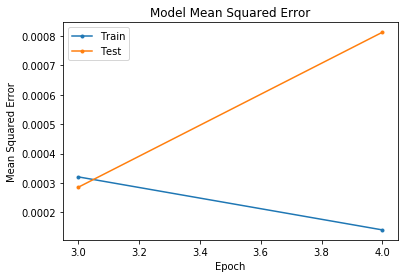

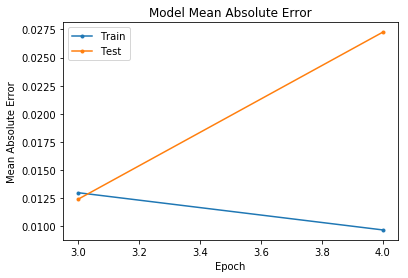

In [24]:
# plot number of added layers vs accuracy
plt.plot(trainscores.keys(), [trainscores[k][0] for k in trainscores.keys()], label='train', marker='.')
plt.plot(testscores.keys(), [testscores[k][0] for k in testscores.keys()], label='test', marker='.')
plt.title('Model Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# plot number of added layers vs accuracy
plt.plot(trainscores.keys(), [trainscores[k][1] for k in trainscores.keys()], label='train', marker='.')
plt.plot(testscores.keys(), [testscores[k][1] for k in testscores.keys()], label='test', marker='.')
plt.title('Model Mean Absolute Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [25]:
print(trainy)

[[0.087193 0.022884 0.022894]
 [0.95274  0.89529  1.      ]
 [0.047246 0.011982 0.016875]
 [0.13516  0.042206 0.099699]
 [0.28923  0.44765  0.28959 ]
 [0.42735  0.52947  0.63258 ]
 [0.32203  0.14713  0.21614 ]
 [1.       0.82966  0.80492 ]
 [0.       0.       0.      ]
 [0.29554  1.       0.40881 ]
 [0.52481  0.16267  0.35035 ]
 [0.11582  0.032275 0.069616]]


In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                200       
_________________________________________________________________
dense_7 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_8 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 153       
Total params: 5,453
Trainable params: 5,453
Non-trainable params: 0
_________________________________________________________________


In [27]:
    import pandas as pd
    import numpy as np

    train=pd.read_csv('data_hamad/unseendata_hamad_Scaled.csv')
    train.head()
    X=train
    #X=train.drop(['Target','Target.1', 'Target.2'] , axis=1)
    #Y=train.drop(['Feature','Feature.1', 'Feature.2'] , axis=1)


    #scaler = MinMaxScaler()

   # scaler.fit(X)
    #scaler.fit(Y)
    
   # X = scaler.transform(X)
   # Y2 = scaler.transform(Y)
    print(X)

        Tar     Tar.1    Tar.2
0    0.0000  0.000000  0.00000
1    0.2000  0.000000  0.00000
2    0.5000  0.000000  0.00000
3    0.7875  0.000000  0.00000
4    1.0000  0.000000  0.00000
5    0.0000  0.066667  0.00000
6    0.2000  0.066667  0.00000
7    0.5000  0.066667  0.00000
8    0.7875  0.066667  0.00000
9    1.0000  0.066667  0.00000
10   0.0000  0.416670  0.00000
11   0.2000  0.416670  0.00000
12   0.5000  0.416670  0.00000
13   0.7875  0.416670  0.00000
14   1.0000  0.416670  0.00000
15   0.0000  0.763330  0.00000
16   0.2000  0.763330  0.00000
17   0.5000  0.763330  0.00000
18   0.7875  0.763330  0.00000
19   1.0000  0.763330  0.00000
20   0.0000  1.000000  0.00000
21   0.2000  1.000000  0.00000
22   0.5000  1.000000  0.00000
23   0.7875  1.000000  0.00000
24   1.0000  1.000000  0.00000
25   0.0000  0.000000  0.20333
26   0.2000  0.000000  0.20333
27   0.5000  0.000000  0.20333
28   0.7875  0.000000  0.20333
29   1.0000  0.000000  0.20333
..      ...       ...      ...
95   0.0

In [28]:
y_hamad_predition=model.predict(X)

In [29]:
print(y_hamad_predition)

[[7.12515175e-01 7.98095703e-01 4.19554949e-01]
 [5.27532995e-01 9.57827449e-01 4.37657207e-01]
 [3.74736309e-01 9.97395635e-01 4.44773078e-01]
 [3.13355505e-01 9.99736428e-01 4.57012773e-01]
 [2.81884998e-01 9.99948144e-01 4.68720973e-01]
 [8.64884198e-01 6.30345345e-01 3.81376177e-01]
 [7.20062435e-01 9.01369929e-01 5.27272999e-01]
 [5.26465893e-01 9.94214892e-01 5.44246912e-01]
 [4.34616208e-01 9.99494135e-01 5.46884775e-01]
 [3.90356928e-01 9.99907136e-01 5.60078204e-01]
 [4.79656041e-01 1.54115409e-01 8.85536969e-02]
 [7.49970019e-01 3.25017452e-01 1.97824001e-01]
 [9.79264021e-01 7.91858435e-01 7.64607787e-01]
 [9.80555296e-01 9.41854119e-01 9.38074350e-01]
 [9.37484682e-01 9.91368294e-01 9.44086671e-01]
 [9.81055796e-02 2.55404711e-02 1.76078975e-02]
 [1.67990535e-01 5.30104935e-02 4.16568220e-02]
 [3.82621408e-01 1.15919679e-01 1.62184477e-01]
 [8.83257985e-01 4.20732677e-01 6.74929380e-01]
 [9.87818003e-01 8.57325256e-01 9.55302238e-01]
 [3.07518542e-02 6.35862350e-03 3.436088

In [30]:
pd.DataFrame({'real'  'real2'  'real3' : list(y_hamad_predition)} ) .to_csv('unseen_results_hamad_DrMaterial.csv',index=True)

In [5]:

model.save('Lattice_optimisation_DLYusra.hdf5')



NameError: name 'model' is not defined

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                200       
_________________________________________________________________
dense_7 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_8 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 153       
Total params: 5,453
Trainable params: 5,453
Non-trainable params: 0
_________________________________________________________________


In [46]:
for layer in model.layers:
    Weights=layer.get_weights()[0]
    Biases=layer.get_weights()[1]
print (Weights)
print (Biases)

[[-3.5953784e-01 -9.8154420e-01 -5.9159958e-01]
 [-3.5946164e-02  9.8379016e-01  1.1157913e+00]
 [-4.3014017e-01  2.8007152e+00 -4.7528390e-02]
 [-9.4107330e-01 -4.8759836e-01 -5.8504355e-01]
 [ 1.7298458e+00  1.4541148e-01  8.4883273e-01]
 [ 1.0794636e+00  1.0003496e+00  9.9934125e-01]
 [ 5.5317614e-02 -6.9149494e-01 -2.1208486e-01]
 [ 2.0542619e-01 -8.2301718e-01 -3.4040993e-01]
 [-6.0348475e-01 -9.6803181e-02 -5.8012271e-01]
 [-5.9729591e-02  1.0980958e+00  5.0590258e-02]
 [ 6.8103886e-01  1.4792023e+00  6.1920375e-01]
 [-1.1676897e+00 -9.2584026e-01 -3.3119130e-01]
 [-3.5175306e-01 -8.5992503e-01 -7.4180096e-01]
 [-6.6826099e-01 -5.4546136e-01 -6.8128771e-01]
 [-2.8162065e-01  1.1616188e+00  2.9502544e-01]
 [ 1.0559724e-03  1.4202957e+00  2.3258270e-01]
 [-4.1099325e-02  2.1361921e+00  3.1059209e-01]
 [ 1.0747550e+00  5.9526366e-01  9.0138972e-01]
 [-7.9788971e-01 -8.8157505e-01 -4.7115561e-01]
 [ 4.6434894e-01 -3.6724150e-01  7.7776593e-01]
 [-1.1701453e+00  4.5053795e-01 -6.18147

In [47]:
#Save model weights and biases
model.save_weights("Lattice_optimisation_DLYusraWeights.h5")

In [10]:




from keras.models import load_model
model = load_model('Lattice_optimisation_DLYusra.h5')

ValueError: You are trying to load a weight file containing 4 layers into a model with 0 layers.

In [17]:
#model2 = Sequential()
#model2.load_weights('Lattice_optimisation_DLYusraWeights.h5')



import os
 
import numpy as np
 
import matplotlib.pyplot as plt
 
import tensorflow as tf

def swish(x):
    return (K.sigmoid(x) * x)
    get_custom_objects().update({'swish': Activation(swish)})

loaded_model = tf.keras.models.load_model("data_hamad/Lattice_optimisation_DLYusra.h5",custom_objects={'swish':swish})
loaded_model.layers[0].input_shape #(None, 160, 160, 3)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.


(None, 3)

In [20]:
    import pandas as pd
    import numpy as np

    train=pd.read_csv('data_hamad/unseendata_hamad_Scaled_2.csv')
    train.head()
    X=train
    #X=train.drop(['Target','Target.1', 'Target.2'] , axis=1)
    #Y=train.drop(['Feature','Feature.1', 'Feature.2'] , axis=1)


    #scaler = MinMaxScaler()

   # scaler.fit(X)
    #scaler.fit(Y)
    
   # X = scaler.transform(X)
   # Y2 = scaler.transform(Y)
    print(X)

        Tar     Tar.1    Tar.2
0    0.0000  0.000000  0.00000
1    0.2000  0.000000  0.00000
2    0.5000  0.000000  0.00000
3    0.7875  0.000000  0.00000
4    1.0000  0.000000  0.00000
5    0.0000  0.066667  0.00000
6    0.2000  0.066667  0.00000
7    0.5000  0.066667  0.00000
8    0.7875  0.066667  0.00000
9    1.0000  0.066667  0.00000
10   0.0000  0.416670  0.00000
11   0.2000  0.416670  0.00000
12   0.5000  0.416670  0.00000
13   0.7875  0.416670  0.00000
14   1.0000  0.416670  0.00000
15   0.0000  0.763330  0.00000
16   0.2000  0.763330  0.00000
17   0.5000  0.763330  0.00000
18   0.7875  0.763330  0.00000
19   1.0000  0.763330  0.00000
20   0.0000  1.000000  0.00000
21   0.2000  1.000000  0.00000
22   0.5000  1.000000  0.00000
23   0.7875  1.000000  0.00000
24   1.0000  1.000000  0.00000
25   0.0000  0.000000  0.20333
26   0.2000  0.000000  0.20333
27   0.5000  0.000000  0.20333
28   0.7875  0.000000  0.20333
29   1.0000  0.000000  0.20333
..      ...       ...      ...
95   0.0

In [21]:
y_hamad_predition_2=loaded_model.predict(X)

In [22]:
print(y_hamad_predition_2)

[[7.63130069e-01 8.20774198e-01 4.36194927e-01]
 [6.97752595e-01 9.61664677e-01 5.10443866e-01]
 [5.03803849e-01 9.96388316e-01 4.89132077e-01]
 [3.29460204e-01 9.99639392e-01 4.74800348e-01]
 [2.47344911e-01 9.99934196e-01 4.76056695e-01]
 [8.49638939e-01 6.36673808e-01 4.27328199e-01]
 [8.37951183e-01 9.05159116e-01 5.86049318e-01]
 [7.18823552e-01 9.92692709e-01 6.08115494e-01]
 [5.34932315e-01 9.99313354e-01 5.89101076e-01]
 [4.10853624e-01 9.99880195e-01 5.82506299e-01]
 [2.93774784e-01 1.39668435e-01 8.54472518e-02]
 [6.55918837e-01 3.13740790e-01 2.21634448e-01]
 [9.78585899e-01 7.96545506e-01 7.75307178e-01]
 [9.89657402e-01 9.75695968e-01 9.35408235e-01]
 [9.82371092e-01 9.96962249e-01 9.49514747e-01]
 [8.92218351e-02 2.34266818e-02 1.33472085e-02]
 [1.60780638e-01 5.74403107e-02 3.39633822e-02]
 [3.65461767e-01 1.44676507e-01 1.36098653e-01]
 [9.18650687e-01 4.99441147e-01 6.62130356e-01]
 [9.93595004e-01 9.10377502e-01 9.62004840e-01]
 [3.60827744e-02 7.33894110e-03 3.347188